<p style="background-color: purple; font-family: newtimeroman; font-size: 250%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b> Credit Score Project</b>

<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 

</p>

- *ID*: The unique identifier for each record in the dataset.
- *Customer_ID*: The unique identifier for each customer.
- *Month*: The month to which the record corresponds.
- *Name*: The name of the customer.
- *Age*: The age of the customer. Note: There are some data quality issues, such as anomalous values.
- *SSN*: The Social Security Number of the customer.
- *Occupation*: The occupation of the customer.
- *Annual_Income*: The annual income of the customer in USD.
- *Monthly_Inhand_Salary*: The monthly take-home (net) salary of the customer in USD.
- *Num_Bank_Accounts*: The number of bank accounts held by the customer.
- *Num_Credit_Card*: The number of credit cards held by the customer.
- *Interest_Rate*: The average interest rate (%) applicable to the customer's loans or credit cards.
- *Num_of_Loan*: The number of loans (including mortgages, personal loans, auto loans, etc.) that the customer has.
- *Type_of_Loan*: The types of loans taken by the customer, listed in a single cell and separated by semicolons.
- *Delay_from_due_date*: The average delay (in days) from the due date for payments across all the customer's loans and credit cards.
- *Num_of_Delayed_Payment*: The total number of times the customer has delayed payments across all loans and credit cards.
- *Changed_Credit_Limit*: Any recent changes to the customer's credit limit (requires further context).
- *Num_Credit_Inquiries*: The number of inquiries made on the customer's credit report, typically indicating applications for new credit.
- *Credit_Mix*: The diversity of credit types held by the customer, affecting credit scores. Specific categories (e.g., "Good", "Bad") need further definition.
- *Outstanding_Debt*: The total outstanding debt the customer has across all loans and credit lines.
- *Credit_Utilization_Ratio*: The ratio of total debt to total available credit, a key indicator of credit risk.
- *Credit_History_Age*: The age of the customer's credit history.
- *Payment_of_Min_Amount*: Indicates whether the customer typically pays at least the minimum amount due on their debts.
- *Total_EMI_per_month*: The total monthly payment the customer makes towards all their loans as EMI (Equated Monthly Installment).
- *Amount_invested_monthly*: The amount of money the customer invests monthly (could be in savings accounts, stocks, bonds, etc.).
- *Payment_Behaviour*: Characterizes the customer's payment behavior in terms of expenditure and value of transactions.
- *Monthly_Balance*: The average monthly balance maintained by the customer in their accounts.
- *Credit_Score*: The credit score of the customer, a summary measure of their creditworthiness.

### Installing Tensorflow

In [1]:
#pip install keras

In [2]:
#!pip install tensorflow

## Import Libraries

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Read Data Sets

In [5]:
df = pd.read_csv("train.csv")
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12               1824.843                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12               1824.843                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                 4.000   
1                    NaN                11.27                 4.000   
2                      7                    _                 4.000   
3                      4                 6.27                 4.000   
4                    NaN                11.27                 4.000   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                    26.823   
1       Good           809.98                    31.945   
2       Good           809.98                    28.609   
3       Good           809.98                    31.378   
4       Good           809.98                    24.797   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No               49.575   
1                    NaN                    No               49.575   
2  22 Years and 3 Months                    No               49.575   
3  22 Years and 4 Months                    No               49.575   
4  22 Years and 5 Months                    No               49.575   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [6]:
df0 = pd.read_csv("test.csv")
df0.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12               1824.843                  3   
1  Scientist      19114.12               1824.843                  3   
2  Scientist      19114.12               1824.843                  3   
3  Scientist      19114.12                    NaN                  3   
4    _______      34847.84               3037.987                  2   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              6           1   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    4   
4                                Credit-Builder Loan                    3   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27              2022.000   
1                      9                13.27                 4.000   
2                      4                12.27                 4.000   
3                      5                11.27                 4.000   
4                      1                 5.42                 5.000   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0       Good           809.98                    35.030   
1       Good           809.98                    33.053   
2       Good           809.98                    33.812   
3       Good           809.98                    32.431   
4       Good           605.03                    25.927   

       Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0   22 Years and 9 Months                    No               49.575   
1  22 Years and 10 Months                    No               49.575   
2                     NaN                    No               49.575   
3   23 Years and 0 Months                    No               49.575   
4   27 Years and 3 Months                    No               18.816   

  Amount_invested_monthly                 Payment_Behaviour  \
0      236.64268203272135    Low_spent_Small_value_payments   
1      21.465380264657146  High_spent_Medium_value_payments   
2      148.23393788500925   Low_spent_Medium_value_payments   
3       39.08251089460281  High_spent_Medium_value_payments   
4      39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923

## EDA

In [7]:
df = clean_columns(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

In [9]:
df.describe().T

count     mean      std     min      25%  \
monthly_inhand_salary     84998.000 4194.171 3183.686 303.645 1625.568   
num_bank_accounts        100000.000   17.091  117.405  -1.000    3.000   
num_credit_card          100000.000   22.474  129.057   0.000    4.000   
interest_rate            100000.000   72.466  466.423   1.000    8.000   
delay_from_due_date      100000.000   21.069   14.860  -5.000   10.000   
num_credit_inquiries      98035.000   27.754  193.177   0.000    3.000   
credit_utilization_ratio 100000.000   32.285    5.117  20.000   28.053   
total_emi_per_month      100000.000 1403.118 8306.041   0.000   30.307   

                              50%      75%       max  
monthly_inhand_salary    3093.745 5957.448 15204.633  
num_bank_accounts           6.000    7.000  1798.000  
num_credit_card             5.000    7.000  1499.000  
interest_rate              13.000   20.000  5797.000  
delay_from_due_date        18.000   28.000    67.000  
num_credit_inquiries        6.000    9.000  2597.000  
credit_utilization_ratio   32.306   36.497    50.000  
total_emi_per_month        69.249  161.224 82331.000

In [10]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
id                            0       0.000
customer_id                   0       0.000
month                         0       0.000
name                       9985       9.980
age                           0       0.000
ssn                           0       0.000
occupation                    0       0.000
annual_income                 0       0.000
monthly_inhand_salary     15002      15.000
num_bank_accounts             0       0.000
num_credit_card               0       0.000
interest_rate                 0       0.000
num_of_loan                   0       0.000
type_of_loan              11408      11.410
delay_from_due_date           0       0.000
num_of_delayed_payment     7002       7.000
changed_credit_limit          0       0.000
num_credit_inquiries       1965       1.960
credit_mix                    0       0.000
outstanding_debt              0       0.000
credit_utilization_ratio      0       0.000
credit_history_age         9030       9.030
payment_of_min_amount         0       0.000
total_emi_per_month           0       0.000
amount_invested_monthly    4479       4.480
payment_behaviour             0       0.000
monthly_balance            1200       1.200
credit_score                  0       0.000

### Drop Unnecessary Columns

In [11]:
df = df.drop(columns=['id', 'age', 'customer_id', 'name', 'ssn', 'type_of_loan'], axis = 1)

### Monthly Inhand Salary

In [12]:
df['monthly_inhand_salary'].fillna(df['monthly_inhand_salary'].median(), inplace=True)

### Num of Delayed Payment

In [13]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].str.replace('-', '').str.replace('_', '')
df['num_of_delayed_payment'] = pd.to_numeric(df['num_of_delayed_payment'], errors='coerce')

df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median(), inplace=True)

In [14]:
df['num_of_delayed_payment'].value_counts()

num_of_delayed_payment
14.000      11195
19.000       5481
17.000       5412
16.000       5312
10.000       5309
            ...  
848.000         1
4134.000        1
1530.000        1
1502.000        1
2047.000        1
Name: count, Length: 708, dtype: int64

### Num Credit Inquiries

In [15]:
df['num_credit_inquiries'].fillna(df['num_credit_inquiries'].median(), inplace=True)

### Payment of Min Amount

In [16]:
df['payment_of_min_amount'].replace({'NM': 'No'}, inplace=True)
df = pd.get_dummies(df, columns=['credit_mix', 'payment_of_min_amount'])

### Credit History Age Months

In [17]:
def years_months_to_months(period):
    if pd.isnull(period):
        return period
    
    parts = period.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['credit_history_age_months'] = df['credit_history_age'].apply(years_months_to_months)

df[['credit_history_age', 'credit_history_age_months']].head()

credit_history_age  credit_history_age_months
0  22 Years and 1 Months                    265.000
1                    NaN                        NaN
2  22 Years and 3 Months                    267.000
3  22 Years and 4 Months                    268.000
4  22 Years and 5 Months                    269.000

In [18]:
df['credit_history_age_months'].fillna(df['credit_history_age_months'].median(), inplace=True)

In [19]:
df = df.drop('credit_history_age', axis = 1)

### Amount Invested Monthly

In [20]:
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'], errors='coerce')

median_amount_invested_monthly = df['amount_invested_monthly'].median()

df['amount_invested_monthly'].fillna(median_amount_invested_monthly, inplace=True)

### Monthly Balance

In [21]:
df['monthly_balance'] = pd.to_numeric(df['monthly_balance'], errors='coerce')

median_monthly_balance = df['monthly_balance'].median()

df['monthly_balance'].fillna(median_monthly_balance, inplace=True)


### Num of Loan 

In [22]:
df['num_of_loan'] = pd.to_numeric(df['num_of_loan'].str.replace('_', '').replace('', np.nan),
                                  errors='coerce').fillna(0).astype(int)

df.loc[df['num_of_loan'] < 0, 'num_of_loan'] = -1

### Change Credit Limit 

In [23]:
df['changed_credit_limit'] = pd.to_numeric(df['changed_credit_limit'].str.replace('_', ''), errors='coerce')

### Payment Behaviour

In [24]:
df['payment_behaviour'] = df['payment_behaviour'].replace('!@9#%8', np.nan)

### Annual Income

In [25]:
df['annual_income'] = pd.to_numeric(df['annual_income'].str.replace('_', ''), errors='coerce')

### NULL Values Check

In [26]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
month                          0       0.000
occupation                     0       0.000
annual_income                  0       0.000
monthly_inhand_salary          0       0.000
num_bank_accounts              0       0.000
num_credit_card                0       0.000
interest_rate                  0       0.000
num_of_loan                    0       0.000
delay_from_due_date            0       0.000
num_of_delayed_payment         0       0.000
changed_credit_limit        2091       2.090
num_credit_inquiries           0       0.000
outstanding_debt               0       0.000
credit_utilization_ratio       0       0.000
total_emi_per_month            0       0.000
amount_invested_monthly        0       0.000
payment_behaviour           7600       7.600
monthly_balance                0       0.000
credit_score                   0       0.000
credit_mix_Bad                 0       0.000
credit_mix_Good                0       0.000
credit_mix_Standard            0       0.000
credit_mix__                   0       0.000
payment_of_min_amount_No       0       0.000
payment_of_min_amount_Yes      0       0.000
credit_history_age_months      0       0.000

## Data Visualization

In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: occupation
Number of Unique Values: 16
First 10 Unique Values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist']
... and 6 more unique values

Column: annual_income
Number of Unique Values: 13487
First 10 Unique Values: [   19114.12    34847.84   143162.64    30689.89    35547.71    73928.46
   131313.4  10909427.      34081.38   114838.41]
... and 13477 more unique values

Column: monthly_inhand_salary
Number of Unique Values: 13235
First 10 Unique Values: [ 1824.84333333  3093.745       3037.98666667 12187.22
  2612.49083333  2853.30916667  5988.705      11242.78333333
 10469.20775939  2611.115     ]
... and 13225 more unique values

Column: num_bank_accounts
Number of Unique Values: 943
First 10 Unique Values: [3 2 1 7 4 0 8 5 6 9]
... and 933 more unique values

Column: num_credit_c

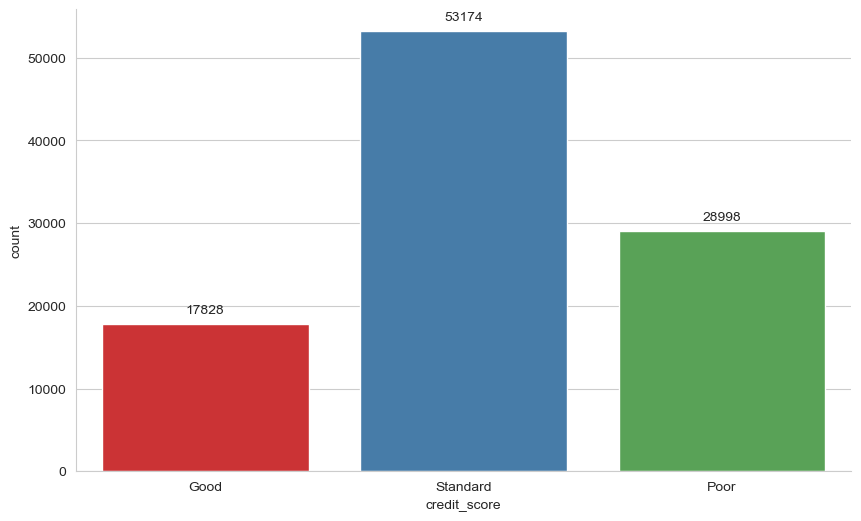

In [28]:
ax = sns.countplot(x=df["credit_score"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

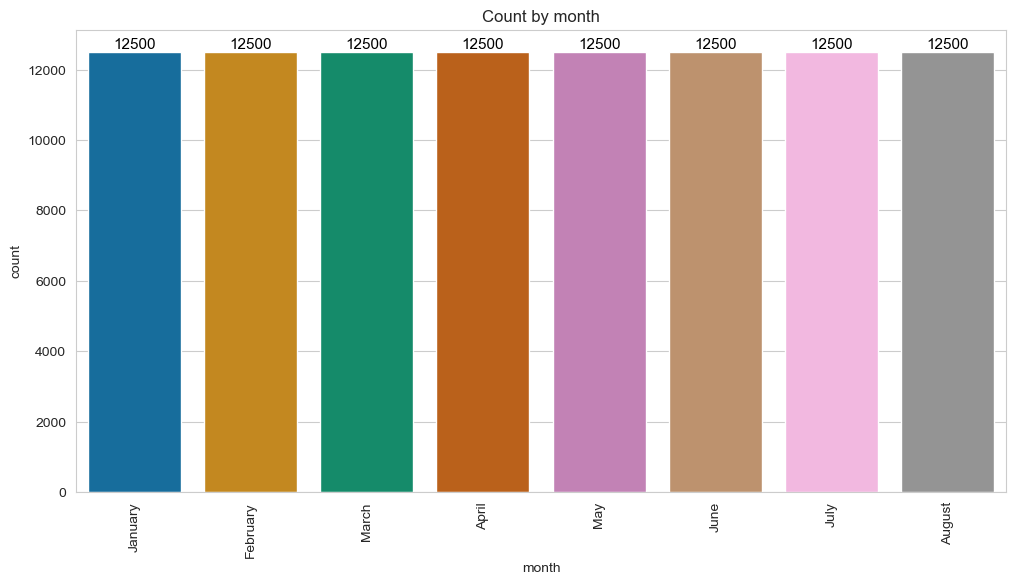

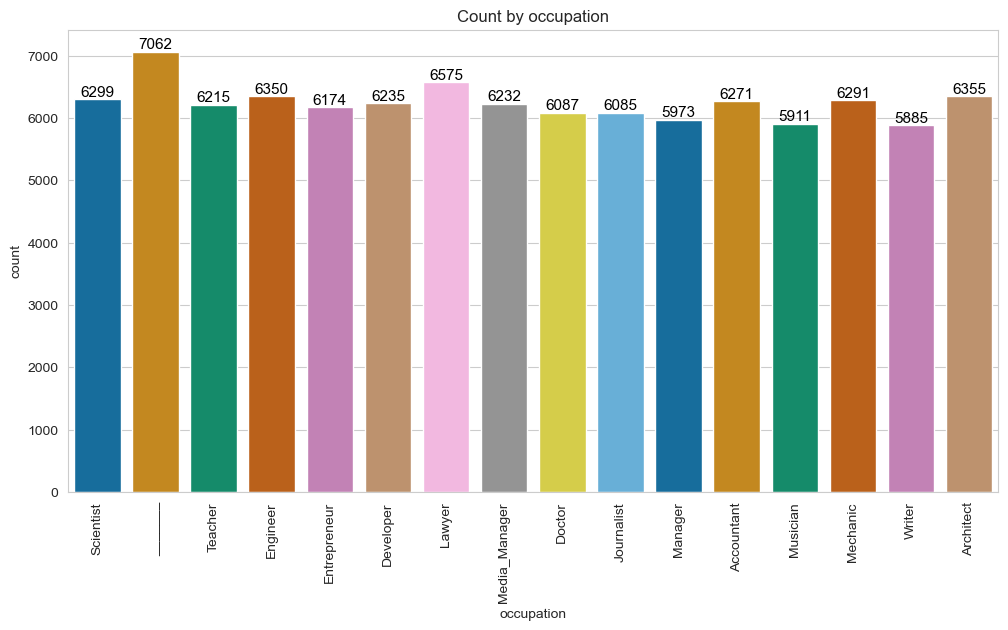

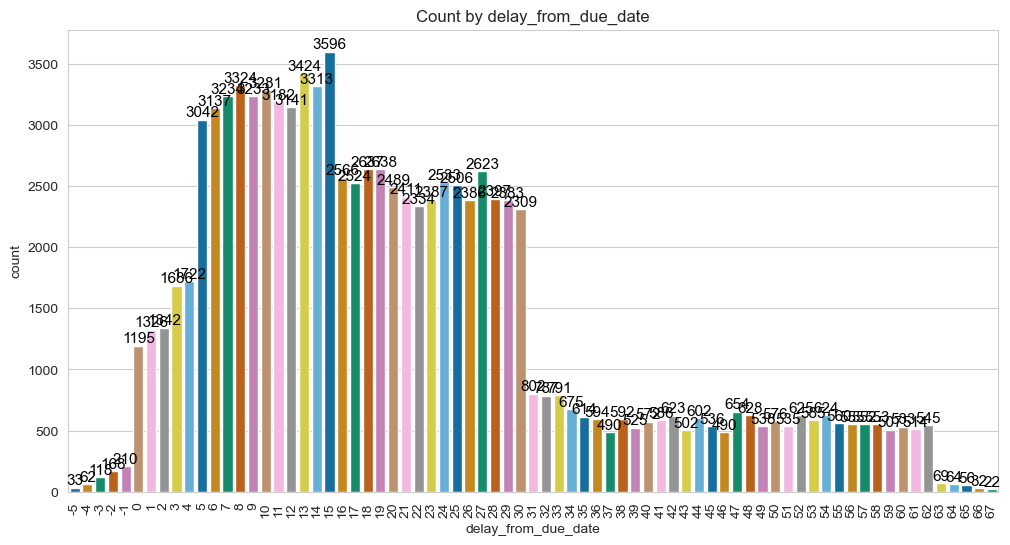

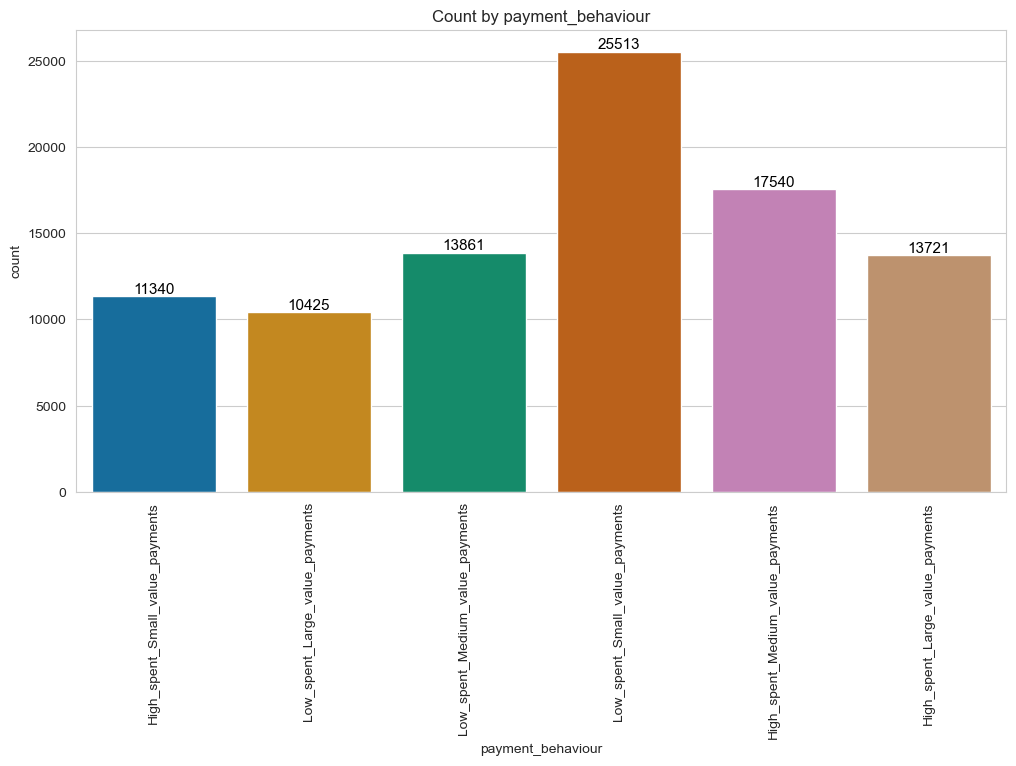

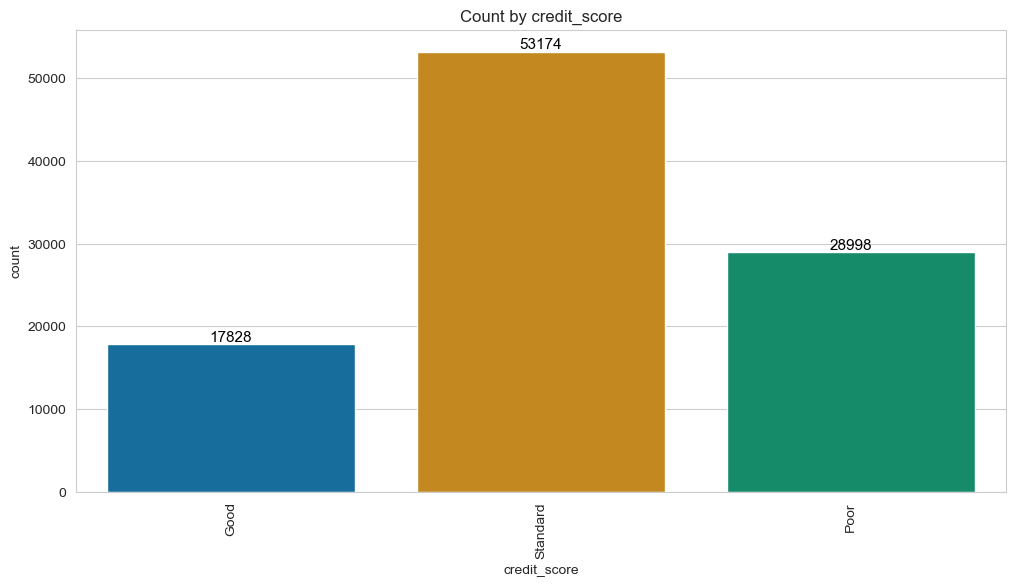

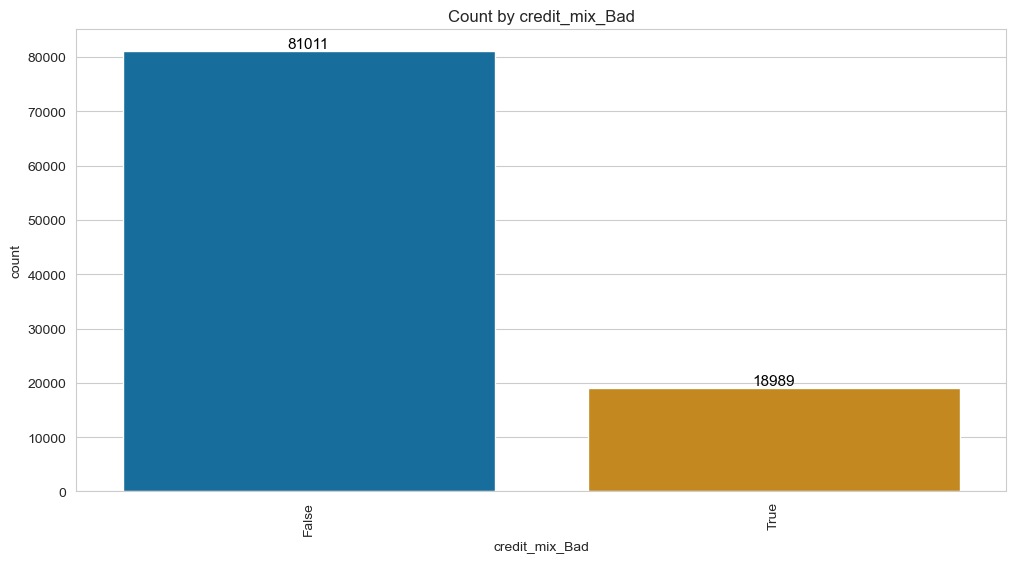

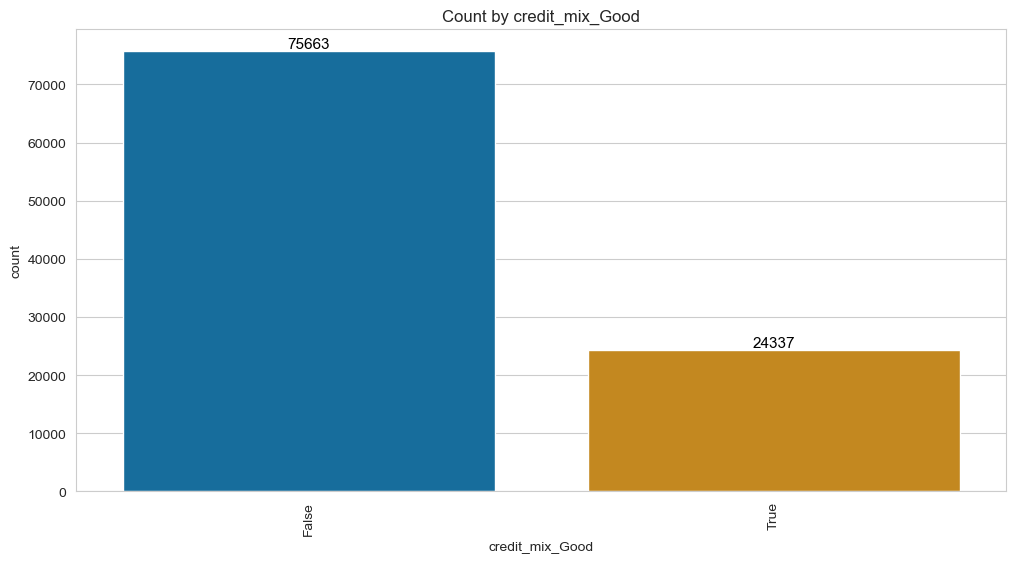

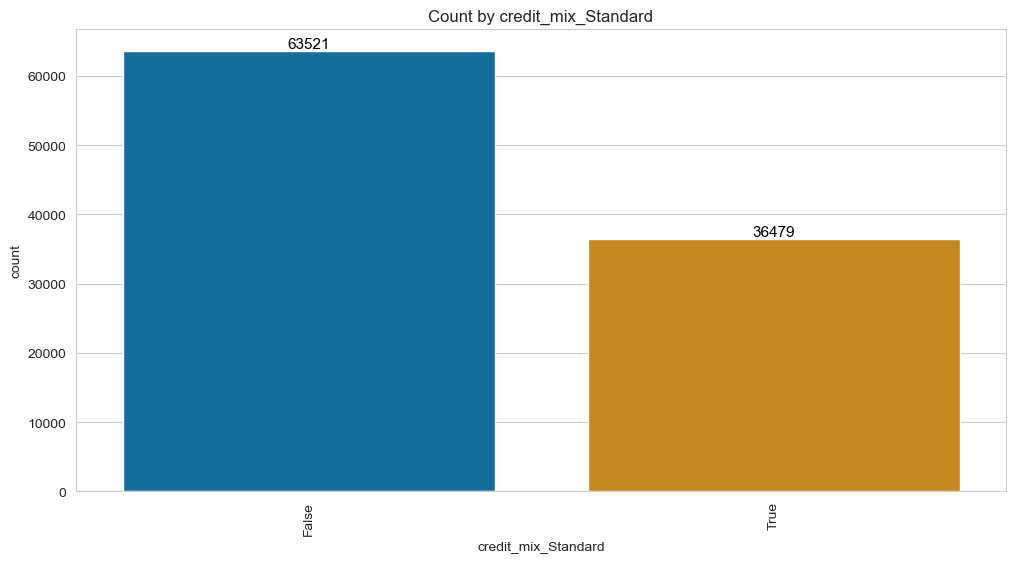

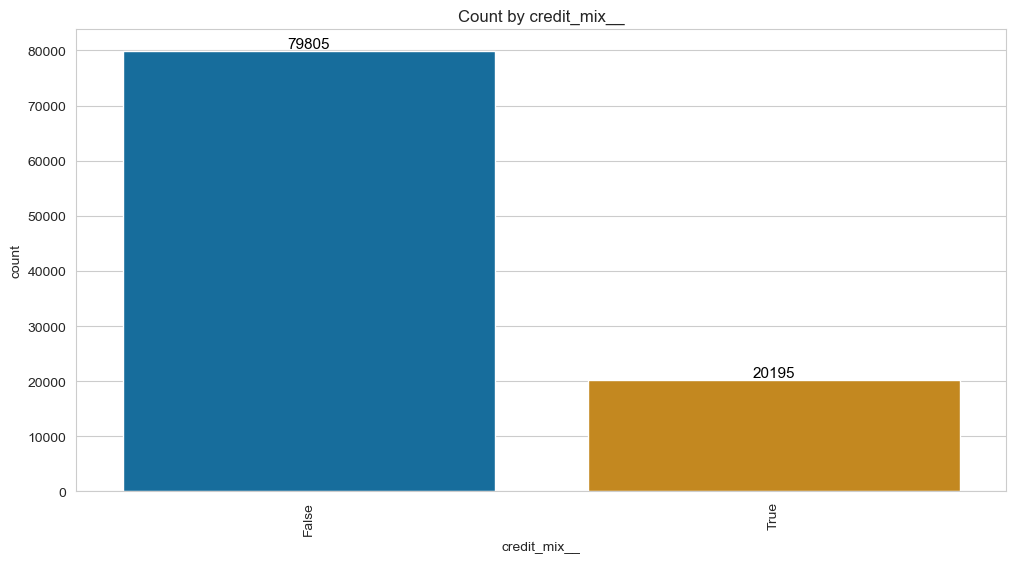

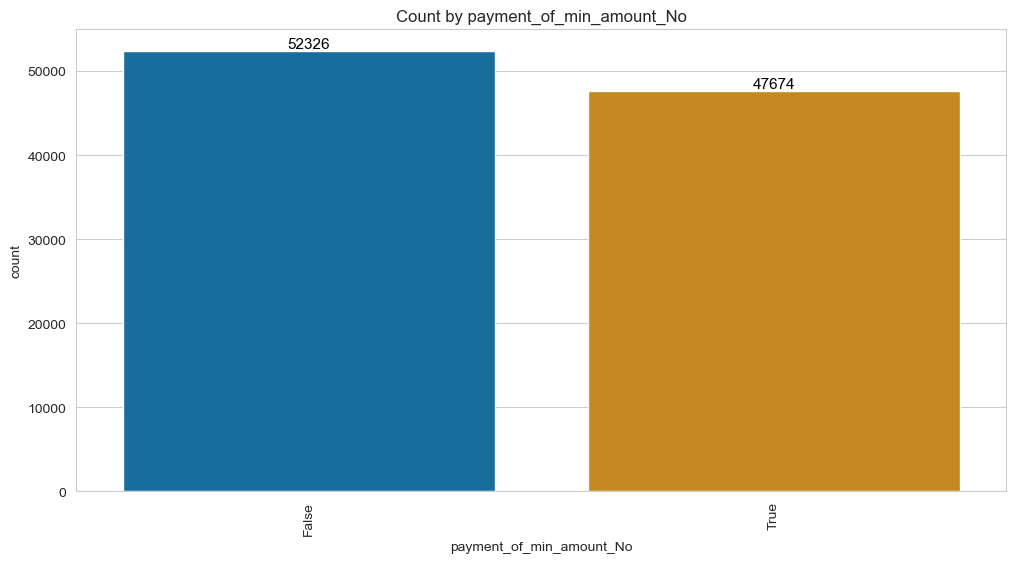

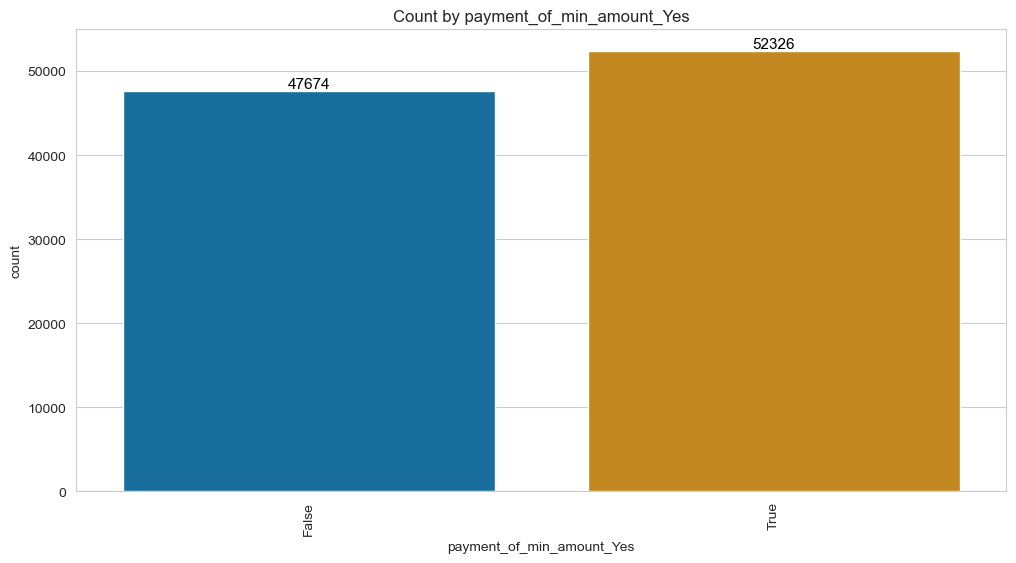

In [29]:
max_unique_values = 100

for col in df.columns:
    if col in df and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=col, data= df, palette="colorblind")
        
        plt.title(f"Count by {col}")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        
        # Adding counts above each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
plt.show()

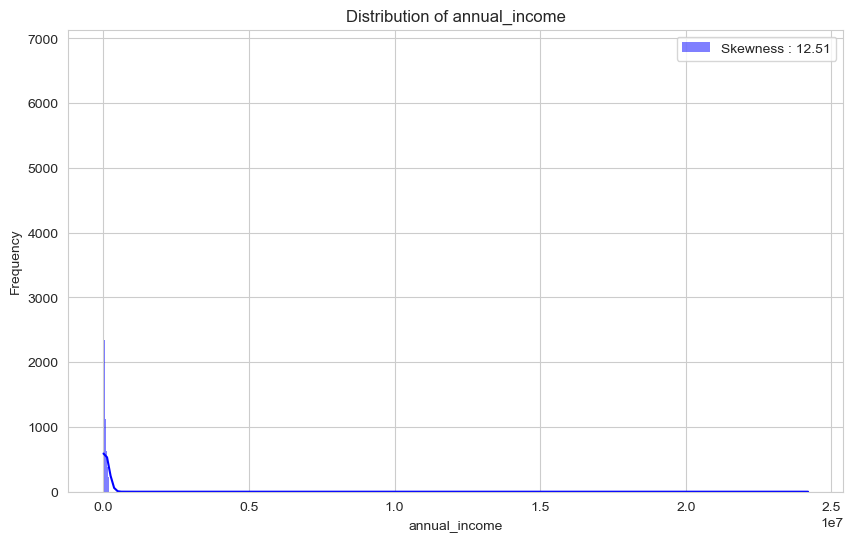

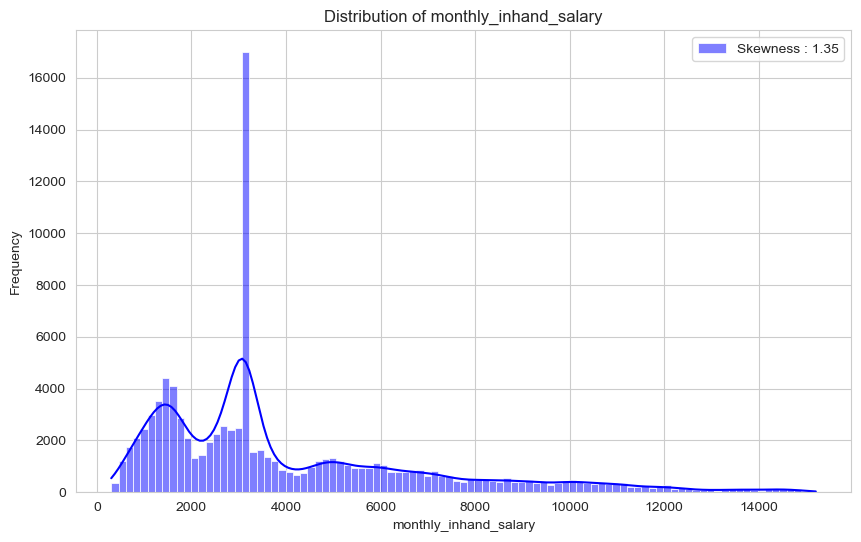

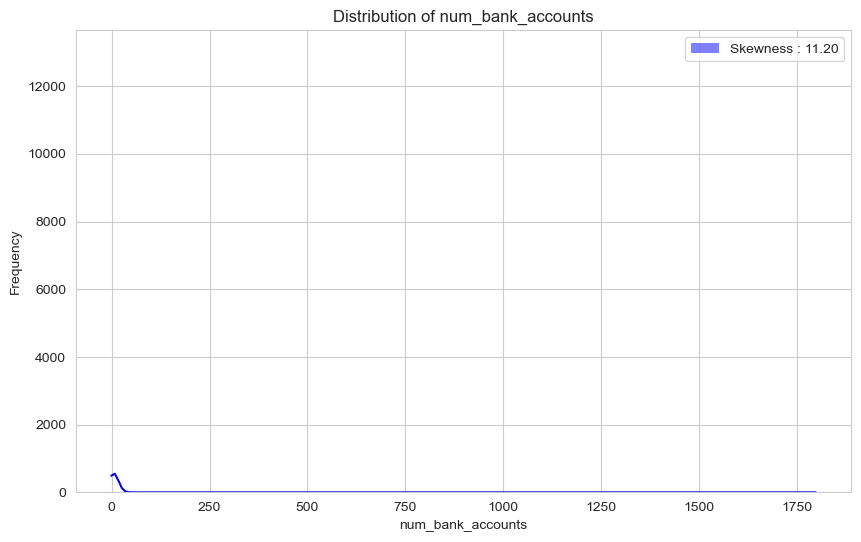

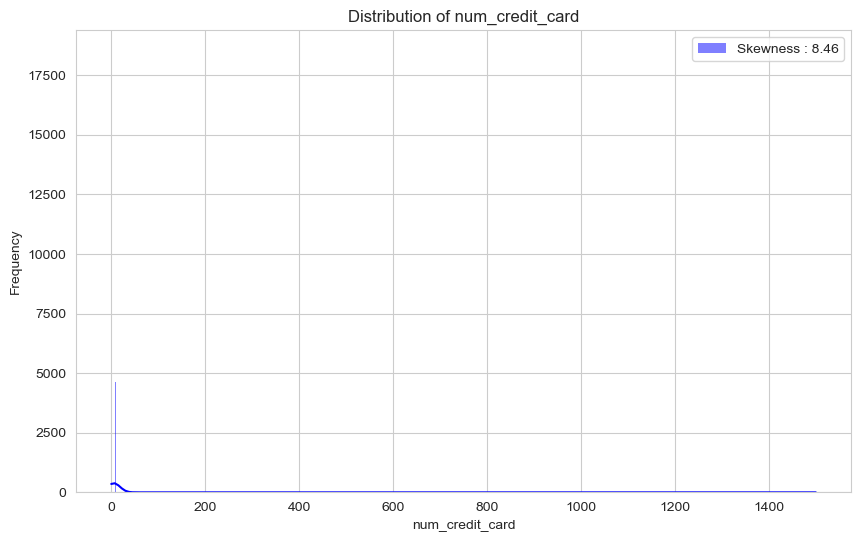

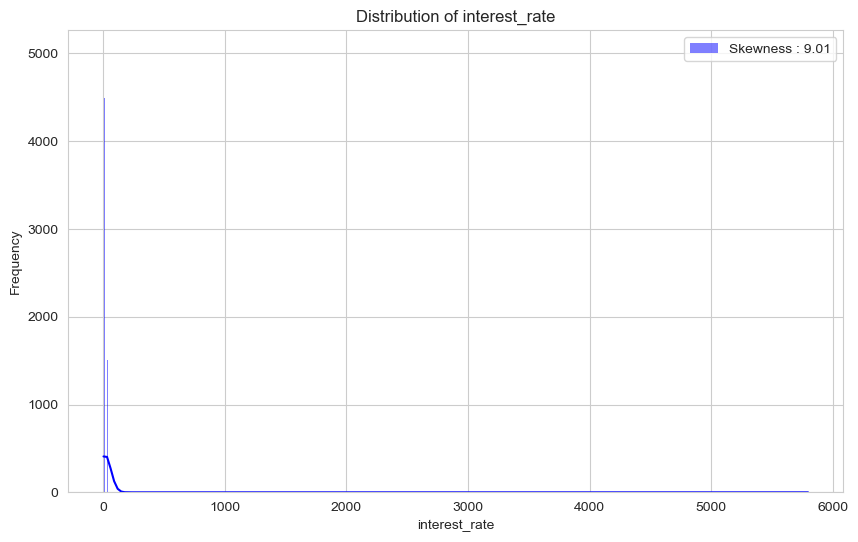

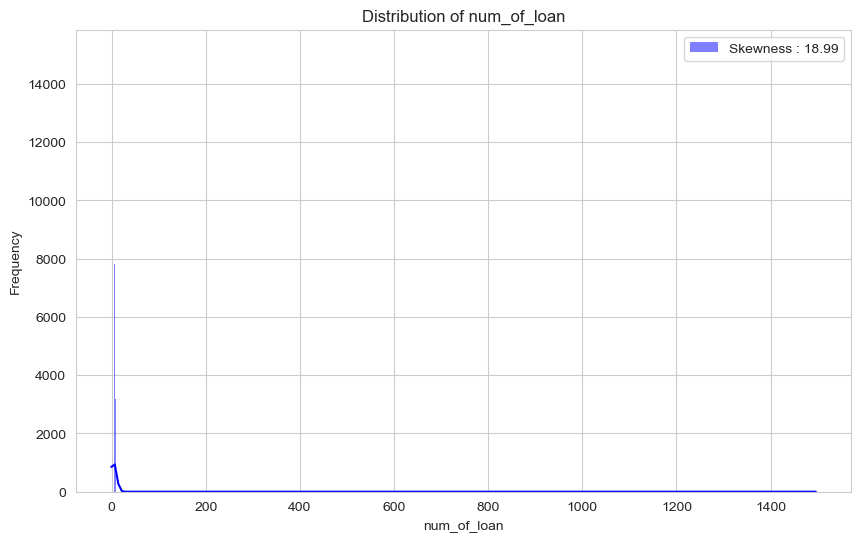

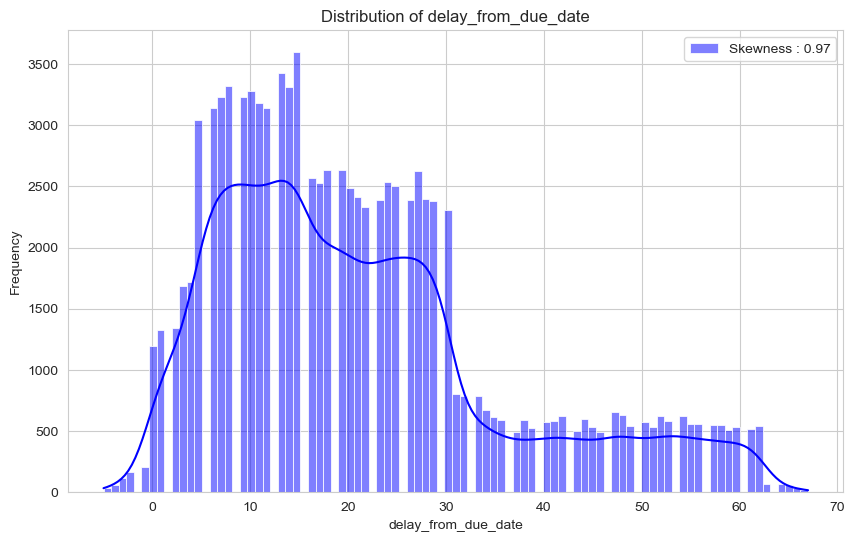

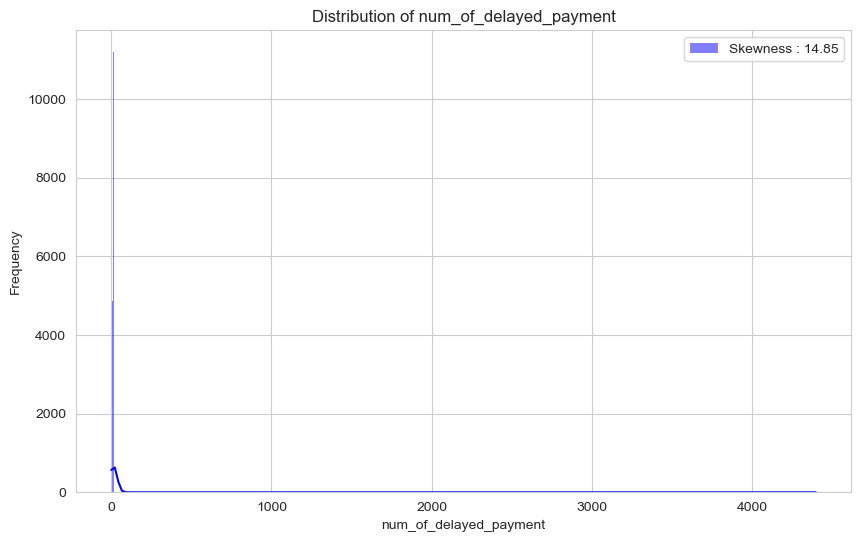

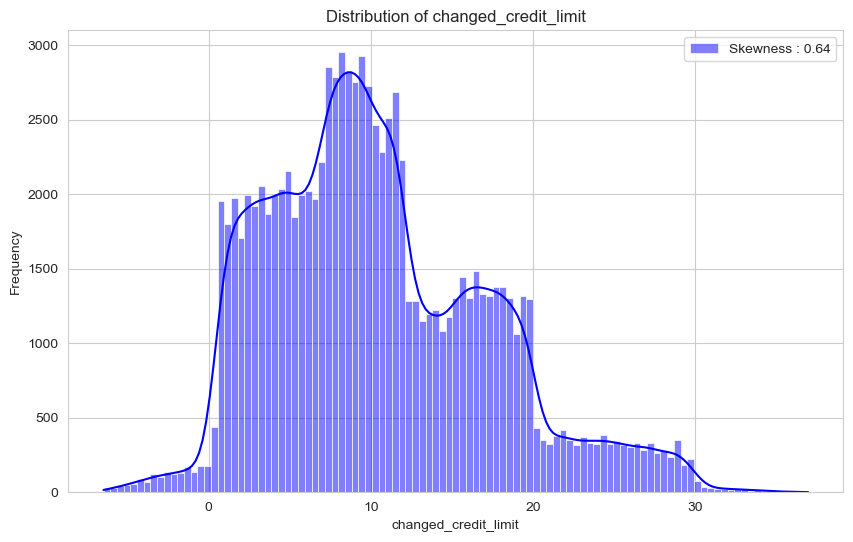

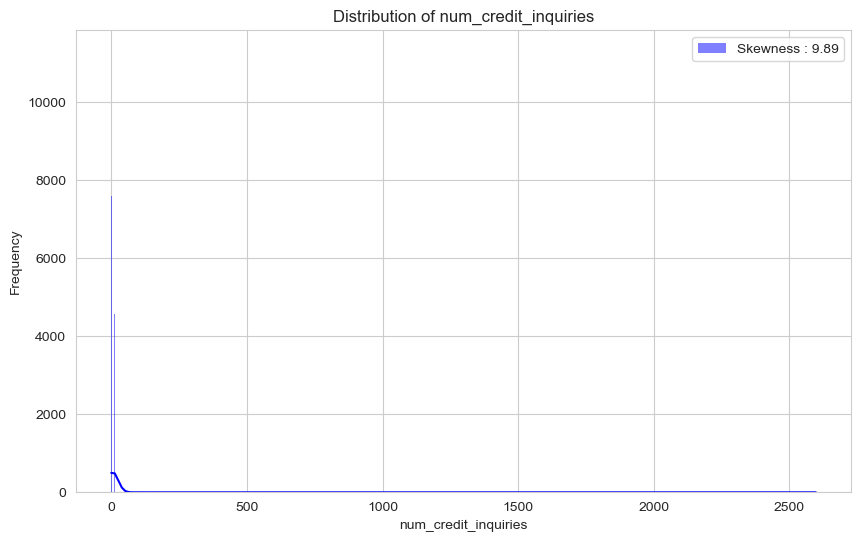

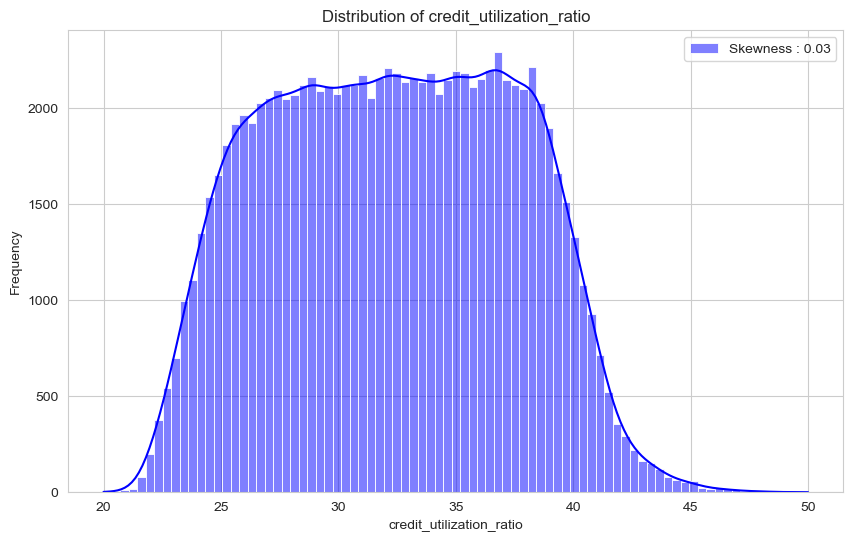

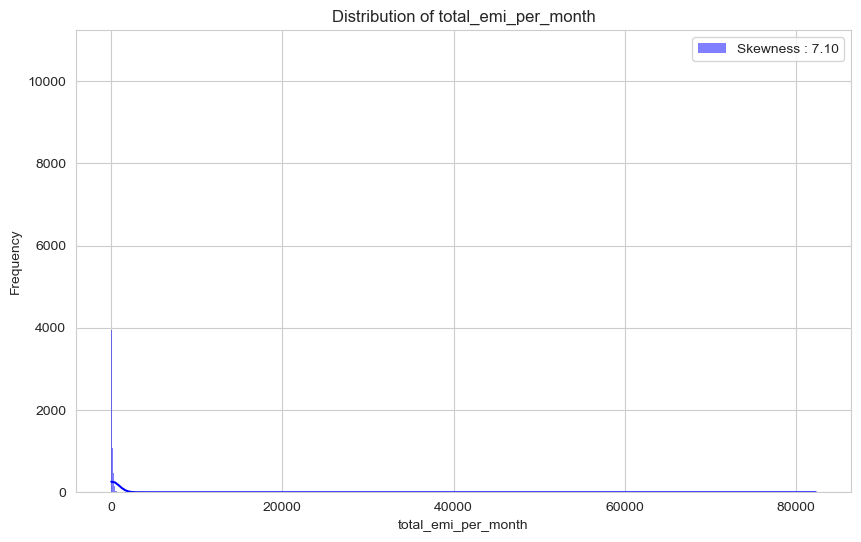

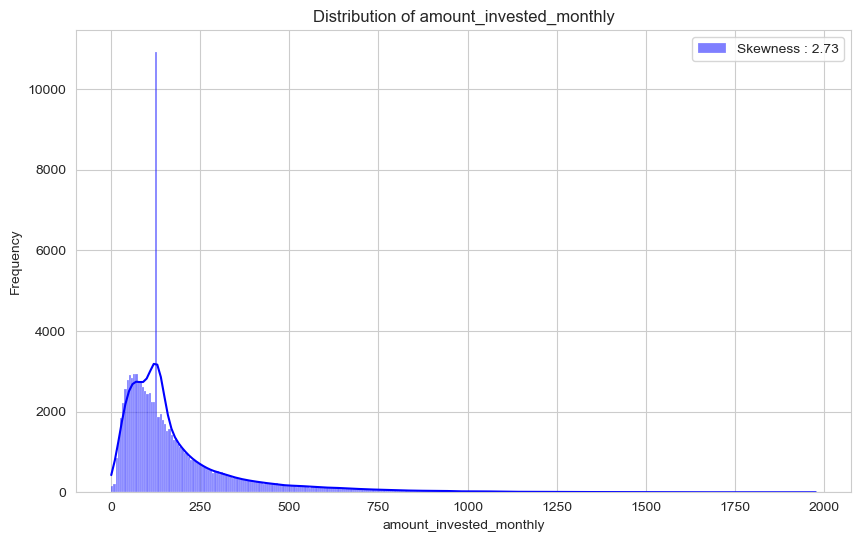

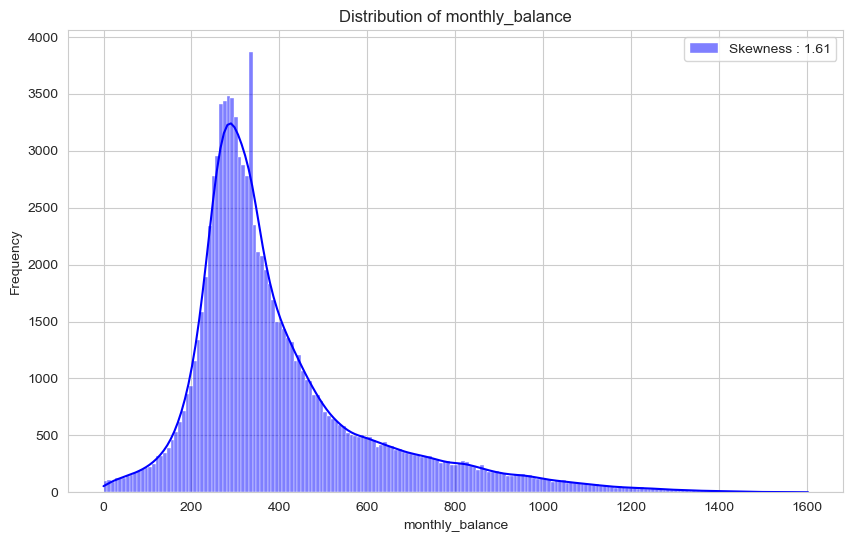

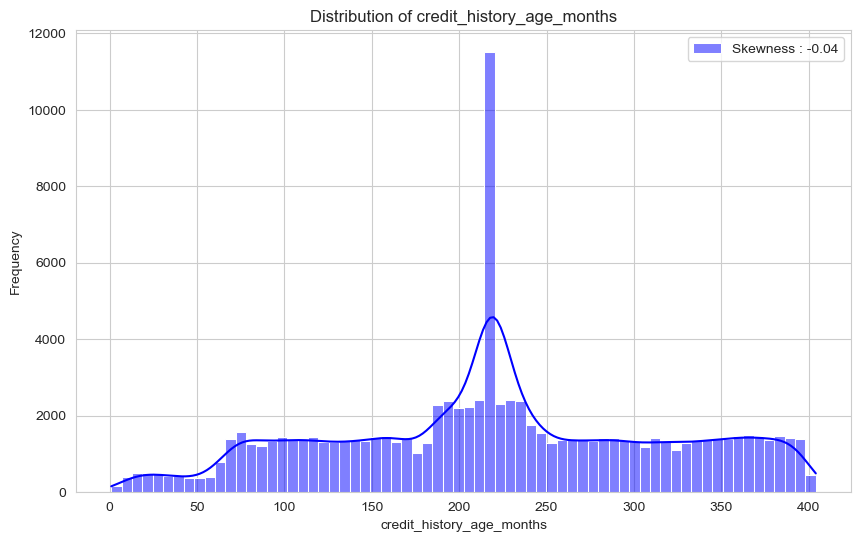

In [30]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="b", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [31]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'credit_score')
create_pie_chart_of_count(df, 'payment_behaviour')
create_pie_chart_of_count(df, 'occupation')

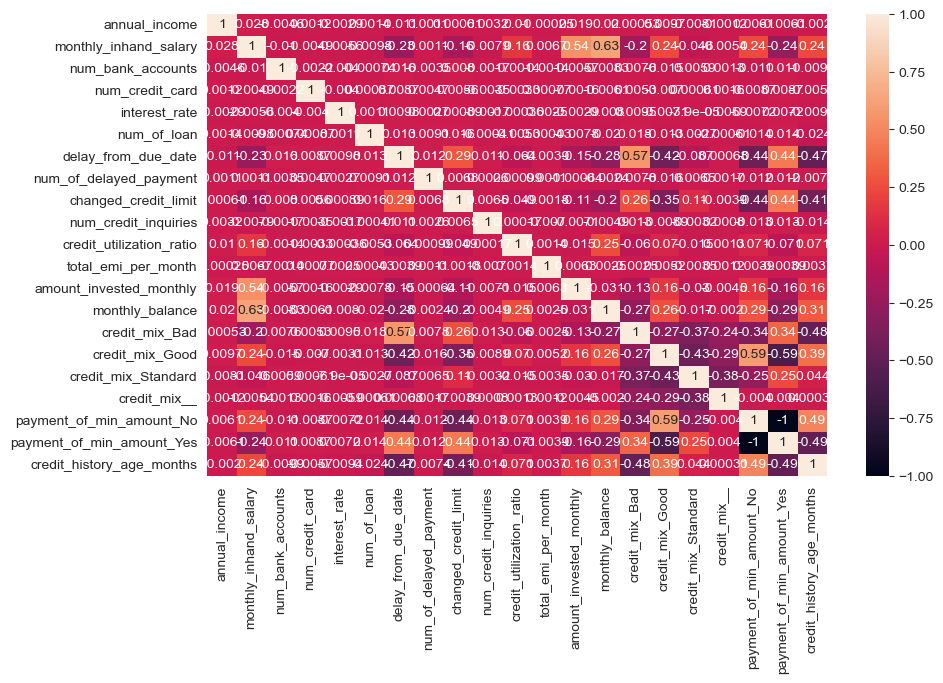

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [33]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

annual_income  monthly_inhand_salary  num_bank_accounts  \
0          19114.120               1824.843                  3   
1          19114.120               3093.745                  3   
2          19114.120               3093.745                  3   
3          19114.120               3093.745                  3   
4          19114.120               1824.843                  3   
...              ...                    ...                ...   
99995      39628.990               3359.416                  4   
99996      39628.990               3359.416                  4   
99997      39628.990               3359.416                  4   
99998      39628.990               3359.416                  4   
99999      39628.990               3359.416                  4   

       num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                   -1   
2                    4              3            4                    3   
3                    4              3            4                    5   
4                    4              3            4                    6   
...                ...            ...          ...                  ...   
99995                6              7            2                   23   
99996                6              7            2                   18   
99997                6           5729            2                   27   
99998                6              7            2                   20   
99999                6              7            2                   18   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
0                       7.000                11.270                 4.000   
1                      14.000                11.270                 4.000   
2                       7.000                   NaN                 4.000   
3                       4.000                 6.270                 4.000   
4                      14.000                11.270                 4.000   
...                       ...                   ...                   ...   
99995                   7.000                11.500                 3.000   
99996                   7.000                11.500                 3.000   
99997                   6.000                11.500                 3.000   
99998                  14.000                11.500                 3.000   
99999                   6.000                11.500                 3.000   

       credit_utilization_ratio  total_emi_per_month  amount_invested_monthly  \
0                        26.823               49.575                   80.415   
1                        31.945               49.575                  118.280   
2                        28.609               49.575                   81.700   
3                        31.378               49.575                  199.458   
4                        24.797               49.575                   41.420   
...                         ...                  ...                      ...   
99995                    34.664               35.104                   60.971   
99996                    40.566               35.104                   54.186   
99997                    41.256               35.104                   24.028   
99998                    33.638               35.104                  251.673   
99999                    34.192               35.104                  167.164   

       monthly_balance  credit_history_age_months  
0              312.494                    265.000  
1              284.629                    219.000  
2              331.210                    267.000  
3              223.451                    268.000  
4              341.489                    269.000  
...                ...                        ...  
99995          479.866                    378.000  

In [34]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color


df_numeric.corr().style.applymap(color_correlation1)

In [ ]:
sns.pairplot(data=df, hue="credit_score")
plt.show()

## Data Preprocessing

### Month

In [ ]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
df['Month'] = df['month'].map(months)

### Occupation

In [ ]:
df['occupation'].replace('________', 'Unknown', inplace=True)

less_frequent_occupations = ['Musician', 'Journalist'] # example categories to combine
df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in less_frequent_occupations else x)

df = pd.get_dummies(df, columns=['occupation'])

### Credit Score 

In [ ]:
df['credit_score'].value_counts()

In [ ]:
class_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
df['credit_score'] = df['credit_score'].map(class_mapping)

## Train - Test Split